### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Step 1: Importing and viewing  the data 

In [1]:
#impording numpy and pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the data
lead_df= pd.read_csv("Leads.csv")

In [3]:
# viewing the data
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Step 2: Data cleaning

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# checking the shape
lead_df.shape

(9240, 37)

In [6]:
# checking for null values
lead_df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Checking the percentage of missing values
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# dropping the columns which are having more null values
lead_df=lead_df.drop(["Country","Specialization","City","Asymmetrique Activity Index","Asymmetrique Profile Index"],axis=1)

In [9]:
# removing null values for "Lead Source" column by removing the rows
lead_df=lead_df[~lead_df["Lead Source"].isnull()]

In [10]:
#removing rows to make the columns non_null
lead_df=lead_df[~lead_df["TotalVisits"].isnull()]

In [11]:
lead_df=lead_df[~lead_df["Page Views Per Visit"].isnull()]

In [12]:
# dropping the rows of null value
lead_df=lead_df[~lead_df["Asymmetrique Activity Score"].isnull()]

In [13]:
lead_df=lead_df[~lead_df["Asymmetrique Profile Score"].isnull()]

In [14]:
#checking for null value in df
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
How did you hear about X Education               23.59
What is your current occupation                  29.12
What matters most to you in choosing a course    29.20
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
lead_df.shape

(4921, 32)

In [16]:
# checking the balance of the data
lead_df["Converted"].value_counts()/len(lead_df.index)

0    0.625889
1    0.374111
Name: Converted, dtype: float64

In [17]:
#dropping the columns which has more null values
lead_df=lead_df.drop(["How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Quality","Lead Profile"],axis=1)

In [18]:
#checking the null value after removal of columns
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [19]:
#data balance checking
lead_df["Converted"].value_counts()/len(lead_df.index)

0    0.625889
1    0.374111
Name: Converted, dtype: float64

In [20]:
# list of columns needs to convert
Col_list=["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

#### step 3: Value convertion and dummy variable creation

In [21]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the column list
lead_df[Col_list] = lead_df[Col_list].apply(binary_map)

In [22]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,15.0,18.0,0,0,Modified


In [23]:
# we can drop "Prospect ID","Lead Number", since they wouldn't be useful in our analysis
lead_df=lead_df.drop(["Lead Number"],axis=1)

In [24]:
# getting dummy variable for lead origin
lead_origin=pd.get_dummies(lead_df["Lead Origin"], drop_first = True)

In [25]:
lead_origin.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
lead_df=pd.concat([lead_df,lead_origin],axis=1)

In [27]:
lead_df=lead_df.drop(["Lead Origin"],axis=1)

In [28]:
# getting dummy variable for Last Activity 
Last_Activity =pd.get_dummies(lead_df["Last Activity"], drop_first = True)

In [29]:
Last_Activity.head() 

,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
lead_df=pd.concat([lead_df,Last_Activity],axis=1)

In [31]:
lead_df=lead_df.drop(["Last Activity"],axis=1)

In [32]:
# getting dummy variable for Last Activity 
Last_Notable_Activity =pd.get_dummies(lead_df["Last Notable Activity"], drop_first = True)

In [33]:
Last_Notable_Activity.head()

,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
# Since Last Activity and Last notable activity has same values, dropping one of them
lead_df=lead_df.drop(["Last Notable Activity"],axis=1)

In [35]:
lead_df.head()

,Prospect ID,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Google,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# getting dummy variable for lead origin
Lead_Source=pd.get_dummies(lead_df["Lead Source"], drop_first = True)

In [37]:
Lead_Source.head()

,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
lead_df=pd.concat([lead_df,Lead_Source],axis=1)

In [39]:
lead_df=lead_df.drop(["Lead Source"],axis=1)

In [40]:
#checking the shape after cleaning
lead_df.shape

(4921, 56)

#### step 4: Outlier treatment

In [41]:
#checking for outlier
lead_df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.0,4921.000000,4921.0,...,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,0.070514,0.000406,0.374111,3.564926,491.016054,2.408069,0.001422,0.0,0.000203,0.0,...,0.000203,0.000406,0.044097,0.024182,0.000406,0.000203,0.013412,0.000203,0.000203,0.001016
std,0.256038,0.020158,0.483942,4.201033,547.477817,2.212106,0.037693,0.0,0.014255,0.0,...,0.014255,0.020158,0.205331,0.153630,0.020158,0.014255,0.115042,0.014255,0.014255,0.031863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,255.000000,2.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.330000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,141.000000,2253.000000,55.000000,1.000000,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.0,4921.000000,4921.0,...,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,0.070514,0.000406,0.374111,3.564926,491.016054,2.408069,0.001422,0.0,0.000203,0.0,...,0.000203,0.000406,0.044097,0.024182,0.000406,0.000203,0.013412,0.000203,0.000203,0.001016
std,0.256038,0.020158,0.483942,4.201033,547.477817,2.212106,0.037693,0.0,0.014255,0.0,...,0.014255,0.020158,0.205331,0.153630,0.020158,0.014255,0.115042,0.014255,0.014255,0.031863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,255.000000,2.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.330000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,8.000000,1377.000000,5.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,10.000000,1565.000000,6.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99%,1.000000,0.000000,1.000000,18.000000,1845.800000,9.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

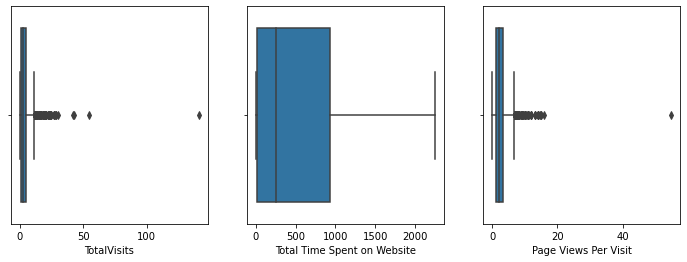

In [43]:
# seems like in columns "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit" has outliers
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
sns.boxplot(lead_df["TotalVisits"])
plt.subplot(1,3,2)
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.subplot(1,3,3)
sns.boxplot(lead_df["Page Views Per Visit"])

In [44]:
# we will remove the outlier 
# removing data which is more than 99th percentile
lead_df=lead_df[lead_df["TotalVisits"]<20]


In [45]:
lead_df=lead_df[lead_df["Total Time Spent on Website"]<2000]

In [46]:
lead_df=lead_df[lead_df["Page Views Per Visit"]<10]

In [47]:
lead_df.shape

(4832, 56)

#### step 5: Train-Test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=lead_df.drop(["Converted","Prospect ID"],axis=1)

In [50]:
y=lead_df["Converted"]

In [51]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Page Visited on Website', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Visited Booth in Tradeshow',
       'Direct Traf

#### Step 6: Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Asymmetrique Activity Score","Asymmetrique Profile Score"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Asymmetrique Activity Score","Asymmetrique Profile Score"]])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [56]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google
9137,0,0,-1.073590,-0.888740,-1.213666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1532,0,0,-1.073590,-0.888740,-1.213666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,-1.073590,-0.888740,-1.213666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7648,0,0,2.497237,-0.395073,-0.253110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8049,0,0,1.198755,1.641993,0.623463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


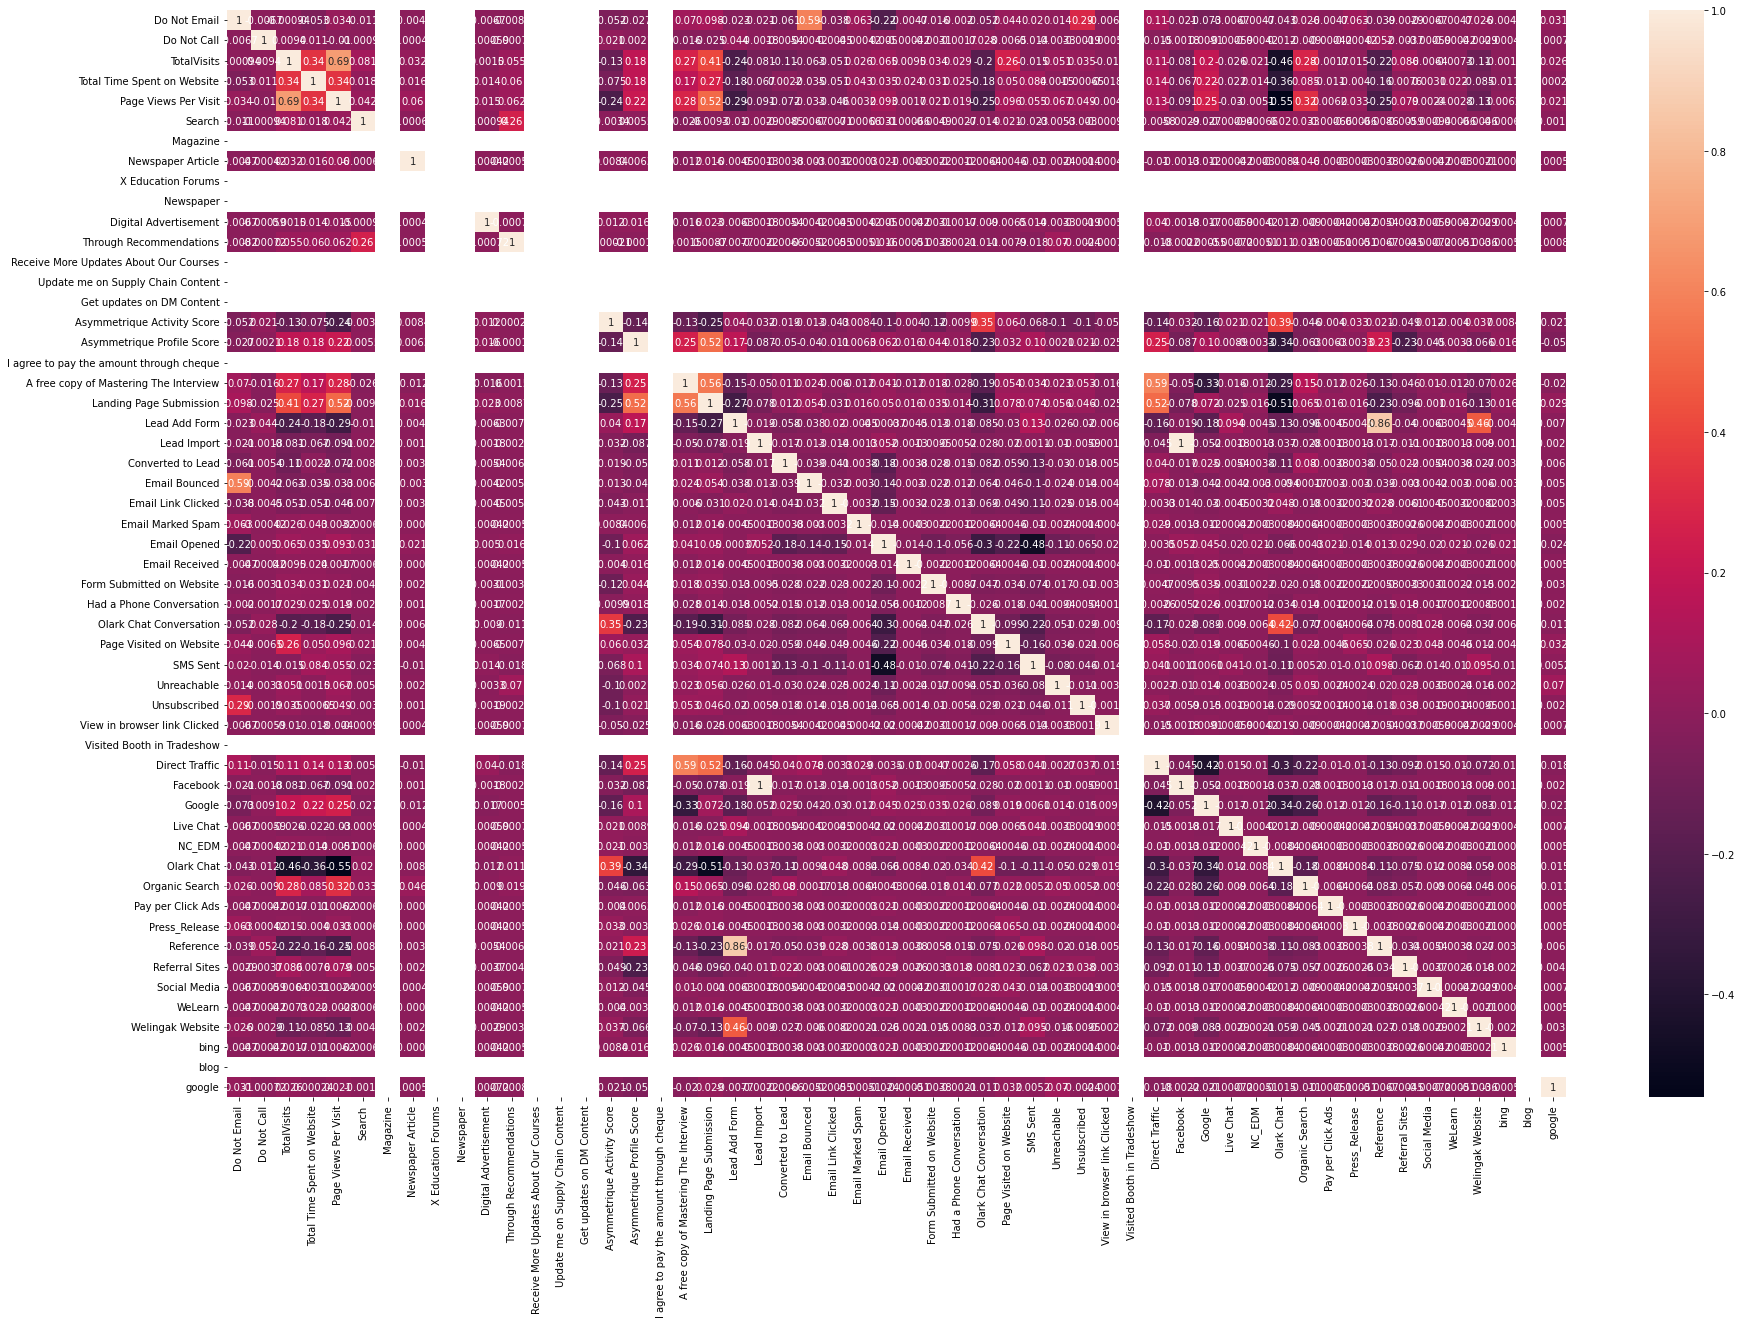

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [58]:
X_train=X_train.drop(['Magazine','X Education Forums', 'Newspaper','Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','Visited Booth in Tradeshow','blog'],axis=1)

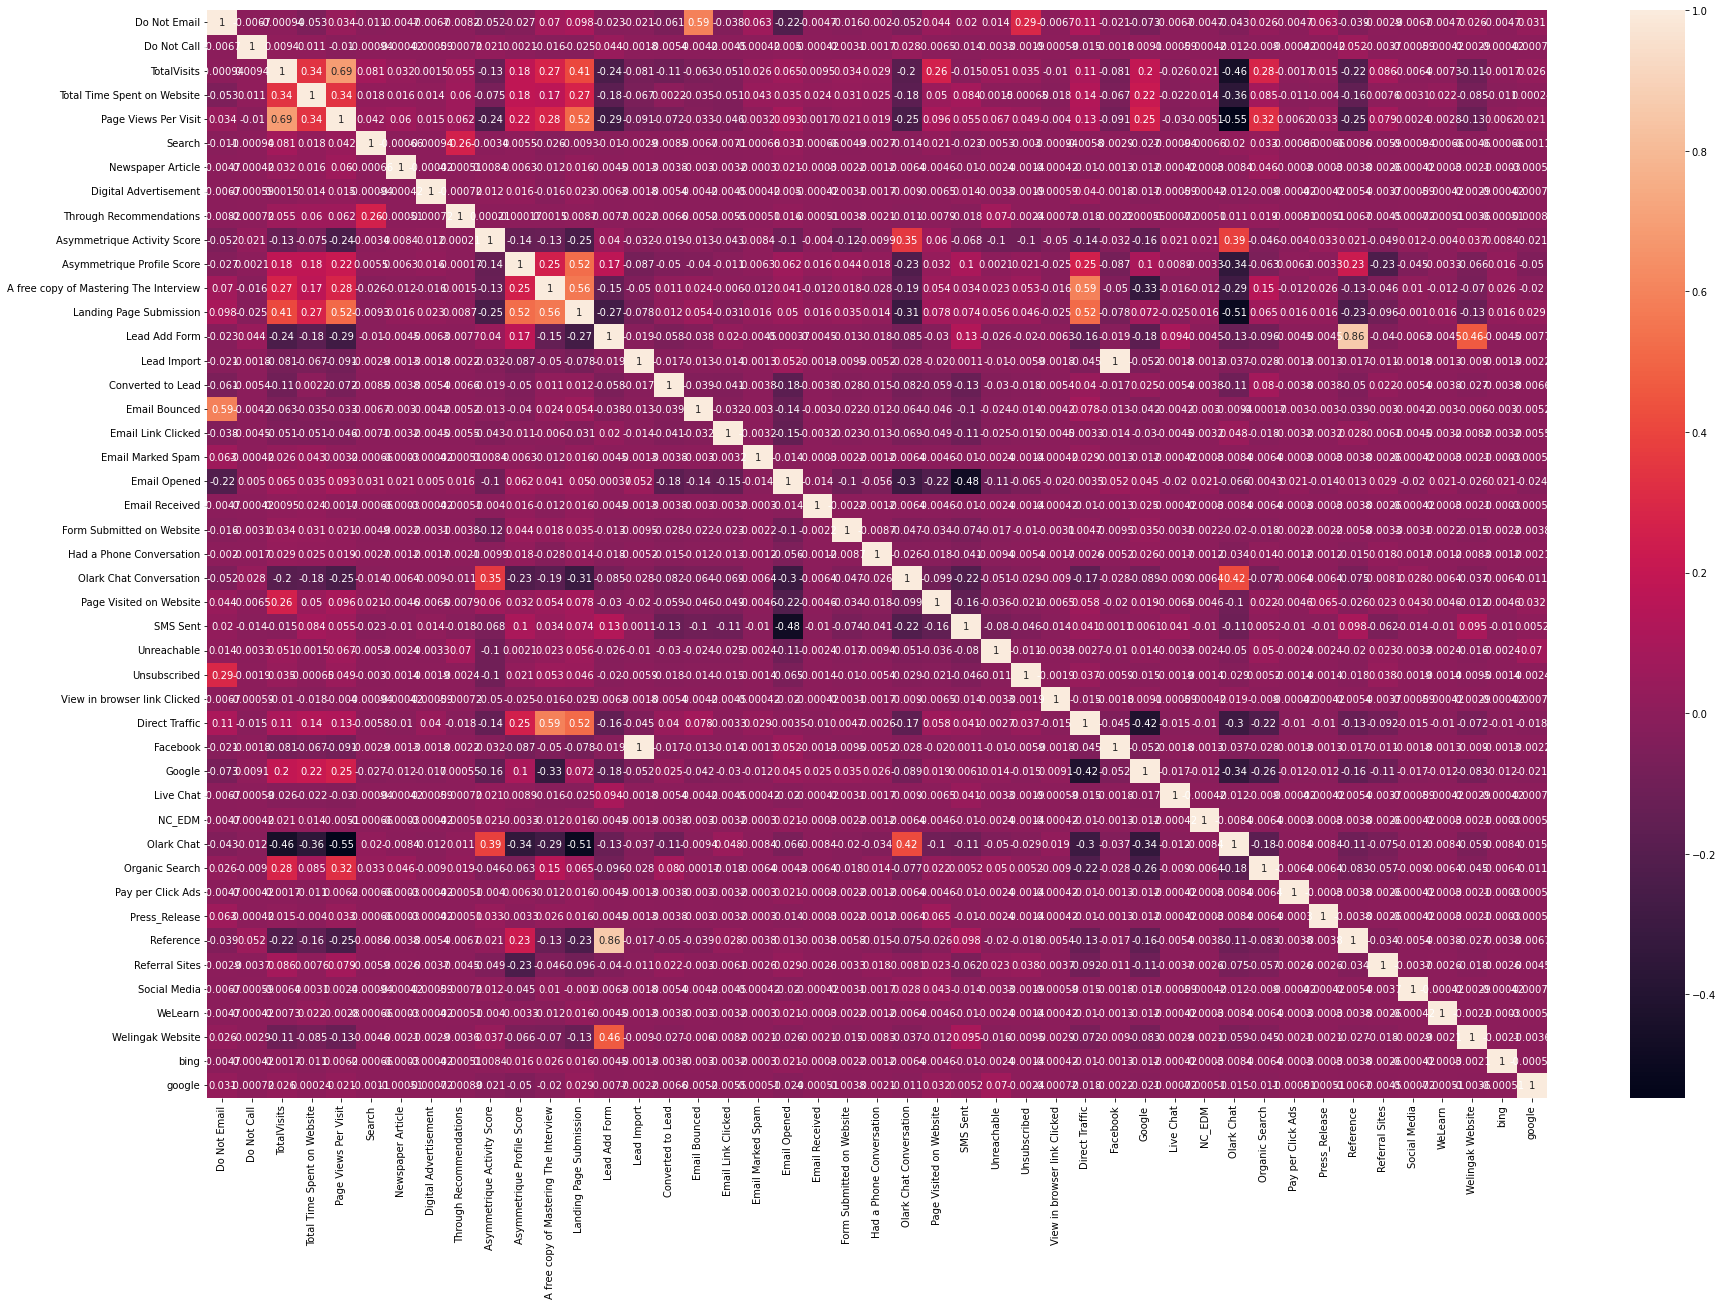

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [60]:
X_train=X_train.drop(['Facebook','Reference'],axis=1)

In [61]:
X_test=X_test.drop(['Magazine','X Education Forums', 'Newspaper','Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','Visited Booth in Tradeshow','blog','Facebook','Reference'],axis=1)

#### Step 7: Model Building

In [62]:
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3382
Model:                            GLM   Df Residuals:                     3338
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.8
Date:                Sun, 16 Jul 2023   Deviance:                       2853.5
Time:                        14:12:50   Pearson chi2:                 3.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.6482    9.1e+04   7.12e-06      1.000   -1.78e+05    1.78e+05
Do Not Email                              -1.4296      0.320     -4.467      0.000      -2.057      -0.802
Do Not Call                               22.3174   5.32e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                0.1422      0.069      2.055      0.040       0.007       0.278
Total Time Spent on Website                1.1434      0.055     20.648      0.000       1.035       1.252
Page Views Per Visit                      -0.1551      0.077     -2.003      0.045      -0.307      -0.003
Search                                     0.9119      1.144      0.797      0.425      -1.330       3.154
Newspaper Article                         23.1867   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                     -0.5092      1.660     -0.307      0.759      -3.764       2.745
Through Recommendations                   21.8938   4.19e+04      0.001      1.000   -8.22e+04    8.22e+04
Asymmetrique Activity Score                0.9586      0.068     14.073      0.000       0.825       1.092
Asymmetrique Profile Score                 0.4941      0.065      7.587      0.000       0.366       0.622
A free copy of Mastering The Interview    -0.0008      0.146     -0.006      0.996      -0.287       0.286
Landing Page Submission                   -0.5705      0.166     -3.445      0.001      -0.895      -0.246
Lead Add Form                             24.0882   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Import                               22.8725   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Converted to Lead                        -23.1311   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Email Bounced                            -23.2145   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Email Link Clicked                       -22.7383   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Email Marked Spam                          0.2101    9.1e+04   2.31e-06      1.000   -1.78e+05    1.78e+05
Email Opened                             -22.4519   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Email Received                             0.2398    9.1e+04   2.63e-06      1.000   -1.78e+05    1.78e+05
Form Submitted on Website                -22.6772   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Had a Phone Conversation                 -19.8947   4.44e+04     -0.000      1.000   -8.71e+04    8.71e+04
Olark Chat Conversation                  -24.4635   4.44e+04     -0.001      1.000   -8.71e+04    8.71e+04
Page Visited on Website                  -23.4887   4.44e+04     -0.001      1.000   -8

### Using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE

In [66]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [67]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Search', False, 2),
 ('Newspaper Article', False, 13),
 ('Digital Advertisement', False, 24),
 ('Through Recommendations', False, 4),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('A free copy of Mastering The Interview', False, 29),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Converted to Lead', True, 1),
 ('Email Bounced', True, 1),
 ('Email Link Clicked', False, 14),
 ('Email Marked Spam', False, 17),
 ('Email Opened', False, 27),
 ('Email Received', False, 16),
 ('Form Submitted on Website', False, 19),
 ('Had a Phone Conversation', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', True, 1),
 ('SMS Sent', True, 1),
 ('Unreachable', False, 3),
 ('Unsubscribed', False, 26),
 ('View in browser link

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Converted to Lead', 'Email Bounced', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Page Visited on Website', 'SMS Sent',
       'Social Media', 'Welingak Website'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Direct Traffic', 'Google', 'Live Chat',
       'NC_EDM', 'Olark Chat', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Referral Sites', 'WeLearn', 'bing', 'google'],
      dtype='object')

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3382
Model:                            GLM   Df Residuals:                     3366
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.2
Date:                Sun, 16 Jul 2023   Deviance:                       2882.5
Time:                        14:12:52   Pearson chi2:                 3.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3681      0.098     -3.773      0.000      -0.559      -0.177
Do Not Email                   -1.4297      0.298     -4.804      0.000      -2.013      -0.846
Total Time Spent on Website     1.1267      0.052     21.853      0.000       1.026       1.228
Asymmetrique Activity Score     0.9966      0.064     15.481      0.000       0.870       1.123
Asymmetrique Profile Score      0.4942      0.063      7.863      0.000       0.371       0.617
Landing Page Submission        -0.8212      0.132     -6.237      0.000      -1.079      -0.563
Lead Add Form                   2.6965      0.297      9.073      0.000       2.114       3.279
Lead Import                     1.4765      0.515      2.869      0.004       0.468       2.485
Converted to Lead              -0.7774      0.234     -3.325      0.001      -1.236      -0.319
Email Bounced                  -0.7983      0.517     -1.545      0.122      -1.811       0.214
Had a Phone Conversation        2.5764      0.783      3.290      0.001       1.041       4.111
Olark Chat Conversation        -1.9649      0.193    -10.182      0.000      -2.343      -1.587
Page Visited on Website        -0.9792      0.205     -4.772      0.000      -1.381      -0.577
SMS Sent                        1.0120      0.111      9.131      0.000       0.795       1.229
Social Media                    2.5423      1.603      1.586      0.113      -0.600       5.685
Welingak Website                2.5068      1.092      2.296      0.022       0.367       4.647
===============================================================================================
"""

In [73]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

9137    0.145018
1532    0.029528
7372    0.547535
7648    0.507849
8049    0.539196
dtype: float64

In [74]:
y_train_pred_df= pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_df["Customer ID"] = lead_df["Prospect ID"] 
y_train_pred_df.head()

,Converted,Converted_Prob,Customer ID
9137,0,0.145018,ccbf495b-b3aa-41bb-98f3-3e4f5949b793
1532,0,0.029528,c2ed2881-fc0c-41f5-aedc-27744537c761
7372,0,0.547535,b510e79d-fe2d-40a3-b3ed-2e329e324591
7648,0,0.507849,c5517982-f99f-4dbb-ab86-fe362d254cc9
8049,0,0.539196,e5bf1523-e423-49af-8b15-05db3fa936ac


In [75]:
#checking with arbitrary cutoff prob 0.5
y_train_pred_df['predicted_value'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

,Converted,Converted_Prob,Customer ID,predicted_value
9137,0,0.145018,ccbf495b-b3aa-41bb-98f3-3e4f5949b793,0
1532,0,0.029528,c2ed2881-fc0c-41f5-aedc-27744537c761,0
7372,0,0.547535,b510e79d-fe2d-40a3-b3ed-2e329e324591,1
7648,0,0.507849,c5517982-f99f-4dbb-ab86-fe362d254cc9,1
8049,0,0.539196,e5bf1523-e423-49af-8b15-05db3fa936ac,1


In [76]:
from sklearn import metrics

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_value )
print(confusion)

[[1837  271]
 [ 411  863]]


In [78]:
print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_value))

0.7983441750443524


In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Landing Page Submission,1.90
0,Do Not Email,1.73
8,Email Bounced,1.65
5,Lead Add Form,1.54
3,Asymmetrique Profile Score,1.45
12,SMS Sent,1.40
14,Welingak Website,1.34
10,Olark Chat Conversation,1.26
2,Asymmetrique Activity Score,1.20
1,Total Time Spent on Website,1.14


In [81]:
X_train_sm.head()

,const,Do Not Email,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Landing Page Submission,Lead Add Form,Lead Import,Converted to Lead,Email Bounced,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,SMS Sent,Social Media,Welingak Website
9137,1.0,0,-0.888740,1.937189,-0.749260,0,0,0,0,0,0,1,0,0,0,0
1532,1.0,0,-0.888740,0.489648,-1.307040,0,0,0,0,0,0,1,0,0,0,0
7372,1.0,0,-0.888740,1.937189,-0.749260,0,0,0,0,0,0,0,0,0,0,0
7648,1.0,0,-0.395073,1.213418,0.924081,1,0,0,0,0,0,0,0,0,0,0
8049,1.0,0,1.641993,-0.957894,-0.749260,0,0,0,0,0,0,0,0,0,0,0


In [82]:
## vif is good but the p value is more for 2 columns will remove and check the value
X_train_sm=X_train_sm.drop(["Email Bounced","Social Media"],axis=1)

In [83]:
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3382
Model:                            GLM   Df Residuals:                     3368
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.6
Date:                Sun, 16 Jul 2023   Deviance:                       2887.3
Time:                        14:12:52   Pearson chi2:                 3.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3826      0.097     -3.932      0.000      -0.573      -0.192
Do Not Email                   -1.6858      0.255     -6.607      0.000      -2.186      -1.186
Total Time Spent on Website     1.1276      0.052     21.876      0.000       1.027       1.229
Asymmetrique Activity Score     0.9931      0.064     15.446      0.000       0.867       1.119
Asymmetrique Profile Score      0.4899      0.063      7.799      0.000       0.367       0.613
Landing Page Submission        -0.8172      0.132     -6.208      0.000      -1.075      -0.559
Lead Add Form                   2.7218      0.298      9.139      0.000       2.138       3.306
Lead Import                     1.4797      0.515      2.875      0.004       0.471       2.489
Converted to Lead              -0.7649      0.234     -3.274      0.001      -1.223      -0.307
Had a Phone Conversation        2.6012      0.789      3.296      0.001       1.054       4.148
Olark Chat Conversation        -1.9322      0.192    -10.066      0.000      -2.308      -1.556
Page Visited on Website        -0.9417      0.205     -4.601      0.000      -1.343      -0.541
SMS Sent                        1.0366      0.110      9.438      0.000       0.821       1.252
Welingak Website                2.4265      1.073      2.262      0.024       0.324       4.529
===============================================================================================
"""

In [84]:
#checking for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Landing Page Submission,1.90
0,Do Not Email,1.73
8,Email Bounced,1.65
5,Lead Add Form,1.54
3,Asymmetrique Profile Score,1.45
12,SMS Sent,1.40
14,Welingak Website,1.34
10,Olark Chat Conversation,1.26
2,Asymmetrique Activity Score,1.20
1,Total Time Spent on Website,1.14


In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

9137    0.146757
1532    0.030149
7372    0.542872
7648    0.503104
8049    0.537606
dtype: float64

In [86]:
y_train_pred_df["Converted_Prob"]=y_train_pred

In [87]:
#checking with arbitrary cutoff prob 0.5
y_train_pred_df['predicted_value'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

,Converted,Converted_Prob,Customer ID,predicted_value
9137,0,0.146757,ccbf495b-b3aa-41bb-98f3-3e4f5949b793,0
1532,0,0.030149,c2ed2881-fc0c-41f5-aedc-27744537c761,0
7372,0,0.542872,b510e79d-fe2d-40a3-b3ed-2e329e324591,1
7648,0,0.503104,c5517982-f99f-4dbb-ab86-fe362d254cc9,1
8049,0,0.537606,e5bf1523-e423-49af-8b15-05db3fa936ac,1


#### Step 8: Evaluating the model

In [88]:
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_value )
print(confusion)

[[1838  270]
 [ 413  861]]


In [89]:
print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_value))

0.7980484920165583


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6758241758241759

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.8719165085388995

In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12808349146110057


In [94]:
# positive predictive value 
print (TP / float(TP+FP))

0.7612732095490716


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8165259884495779


#### step 9: Plotting ROC Curve

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False )

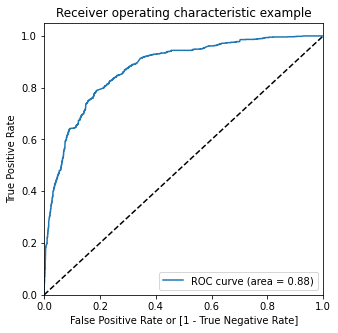

In [98]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

#### step 10:  Finding optimal cutoff Probability

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,Customer ID,predicted_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9137,0,0.146757,ccbf495b-b3aa-41bb-98f3-3e4f5949b793,0,1,1,0,0,0,0,0,0,0,0
1532,0,0.030149,c2ed2881-fc0c-41f5-aedc-27744537c761,0,1,0,0,0,0,0,0,0,0,0
7372,0,0.542872,b510e79d-fe2d-40a3-b3ed-2e329e324591,1,1,1,1,1,1,1,0,0,0,0
7648,0,0.503104,c5517982-f99f-4dbb-ab86-fe362d254cc9,1,1,1,1,1,1,1,0,0,0,0
8049,0,0.537606,e5bf1523-e423-49af-8b15-05db3fa936ac,1,1,1,1,1,1,1,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376700  1.000000  0.000000
0.1   0.1  0.593140  0.970958  0.364801
0.2   0.2  0.738321  0.923077  0.626660
0.3   0.3  0.782082  0.839089  0.747628
0.4   0.4  0.800710  0.760597  0.824953
0.5   0.5  0.798048  0.675824  0.871917
0.6   0.6  0.799527  0.598116  0.921252
0.7   0.7  0.768480  0.482732  0.941176
0.8   0.8  0.746304  0.375196  0.970588
0.9   0.9  0.698699  0.217425  0.989564


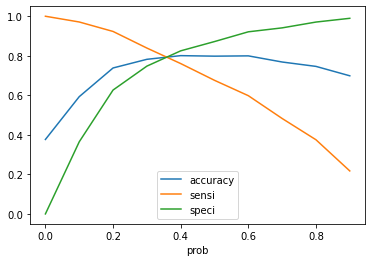

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [140]:
# From the curve we can see the optimal cutoff is 0.38
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_df.head()

,Converted,Converted_Prob,Customer ID,predicted_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
9137,0,0.146757,ccbf495b-b3aa-41bb-98f3-3e4f5949b793,0,1,1,0,0,0,0,0,0,0,0,0
1532,0,0.030149,c2ed2881-fc0c-41f5-aedc-27744537c761,0,1,0,0,0,0,0,0,0,0,0,0
7372,0,0.542872,b510e79d-fe2d-40a3-b3ed-2e329e324591,1,1,1,1,1,1,1,0,0,0,0,1
7648,0,0.503104,c5517982-f99f-4dbb-ab86-fe362d254cc9,1,1,1,1,1,1,1,0,0,0,0,1
8049,0,0.537606,e5bf1523-e423-49af-8b15-05db3fa936ac,1,1,1,1,1,1,1,0,0,0,0,1


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)*100

80.30751034890598

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion2

array([[1720,  388],
       [ 278,  996]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)*100

78.1789638932496

In [146]:
# Let us calculate specificity
TN / float(TN+FP)*100

81.59392789373814

In [148]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP)*100)

18.40607210626186


In [149]:
# Positive predictive value 
print (TP / float(TP+FP)*100)

71.96531791907515


In [150]:
# Negative predictive value
print (TN / float(TN+ FN)*100)

86.08608608608608


#### Step 11: Precision and Recall


In [111]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
confusion

array([[1720,  388],
       [ 278,  996]], dtype=int64)

In [112]:
#Precision TP / TP + FP
Precision= TP/float(TP+FP)
print(Precision)

0.7196531791907514


In [113]:
#Recall TP / TP + FN
Recall=TP / float(TP + FN)
print(Recall)

0.7817896389324961


#### checking Precision and Recall for both prediction using sklearn

In [114]:
from sklearn.metrics import precision_score, recall_score

In [151]:
#Prediction for cutoff 0.5
precision_score(y_train_pred_df.Converted, y_train_pred_df.predicted_value)*100


76.12732095490716

In [152]:
# recall for cutoff 0.5
recall_score(y_train_pred_df.Converted, y_train_pred_df.predicted_value)*100


67.58241758241759

In [153]:
#prediction value for cutoff 0.38
precision_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)*100

71.96531791907515

In [154]:
# recall value for cutoff 0.38
recall_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)*100


78.1789638932496

#### Precision and Recall Tradeoff

In [119]:
from sklearn.metrics import precision_recall_curve

In [120]:
y_train_pred_df.Converted, y_train_pred_df.final_predicted

(9137    0
 1532    0
 7372    0
 7648    0
 8049    0
        ..
 8536    0
 1991    1
 379     1
 84      1
 8302    0
 Name: Converted, Length: 3382, dtype: int64,
 9137    0
 1532    0
 7372    1
 7648    1
 8049    1
        ..
 8536    0
 1991    1
 379     0
 84      1
 8302    0
 Name: final_predicted, Length: 3382, dtype: int64)

In [121]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

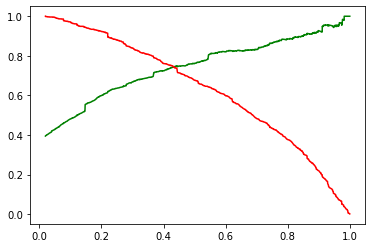

In [122]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Step 12: Making predictions on the test set

In [123]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Asymmetrique Activity Score","Asymmetrique Profile Score"]]=scaler.fit_transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Asymmetrique Activity Score","Asymmetrique Profile Score"]])

In [124]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Landing Page Submission,Lead Add Form,Lead Import,Converted to Lead,Email Bounced,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,SMS Sent,Social Media,Welingak Website
8547,0,-0.900733,0.532983,1.478776,0,1,0,0,0,0,0,0,0,0,0
2604,0,-0.900733,-0.176682,2.029001,1,0,0,0,0,0,0,0,0,0,0
1921,0,-0.744243,1.952315,-1.272347,0,0,0,0,0,0,1,0,0,0,0
2475,0,-0.900733,0.532983,1.478776,0,1,0,0,0,0,0,0,1,0,0
326,0,-0.733065,-0.176682,-0.722122,0,0,0,0,0,0,0,1,0,0,0


In [125]:
X_test=X_test.drop(['Email Bounced','Social Media'],axis=1)

In [126]:
X_test_sm = sm.add_constant(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8547    0.929382
2604    0.198302
1921    0.137221
2475    0.973759
326     0.064154
717     0.068152
1592    0.123909
10      0.629164
7923    0.289372
4796    0.069498
dtype: float64

In [128]:
y_test_pred_df= pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_df["Customer ID"] = lead_df["Prospect ID"] 
y_test_pred_df.head()

,Converted,Converted_Prob,Customer ID
8547,1,0.929382,f5510e84-b8fb-4f7d-b78f-4724183d322d
2604,0,0.198302,c6ee01dd-cd3b-40b6-8b83-6f4939457448
1921,0,0.137221,65979174-21ab-4ff7-a306-2550fe7276f8
2475,1,0.973759,270786a4-b9a0-4fd8-befc-5966b258355b
326,0,0.064154,f11eba6e-f398-4dd1-9e6a-1f52b1df22f8


In [129]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [130]:
y_test_pred_df.head()

,Converted,Converted_Prob,Customer ID,final_predicted
8547,1,0.929382,f5510e84-b8fb-4f7d-b78f-4724183d322d,1
2604,0,0.198302,c6ee01dd-cd3b-40b6-8b83-6f4939457448,0
1921,0,0.137221,65979174-21ab-4ff7-a306-2550fe7276f8,0
2475,1,0.973759,270786a4-b9a0-4fd8-befc-5966b258355b,1
326,0,0.064154,f11eba6e-f398-4dd1-9e6a-1f52b1df22f8,0


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)*100

79.65517241379311

In [159]:
confusion2 = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_predicted)
confusion2

array([[762, 158],
       [137, 393]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)*100

74.15094339622641

In [162]:
# Let us calculate specificity
TN / float(TN+FP)*100

82.82608695652173

In [163]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP)*100)

17.17391304347826


In [164]:
# Positive predictive value 
print (TP / float(TP+FP)*100)

71.32486388384754


In [165]:
# Negative predictive value
print (TN / float(TN+ FN)*100)

84.76084538375973
